In [1]:
import dask.array as da
import numpy as np
import pandas as pd

In [8]:
n_rows = 10000
n_cols = 10000
a = np.random.randint(low=0, high=20, size=(n_rows,n_cols), dtype=np.int64)
df = pd.DataFrame(a)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,1,11,7,15,10,11,12,11,3,9,...,19,4,0,6,12,3,19,5,13,4
1,12,14,10,17,14,10,8,18,6,4,...,9,1,11,17,14,0,10,1,2,19
2,16,2,16,7,0,18,13,8,3,4,...,0,13,15,17,17,3,19,8,8,17
3,17,15,1,14,0,4,7,15,13,8,...,13,10,16,17,1,4,10,5,14,1
4,11,0,18,8,18,4,9,9,1,18,...,7,16,2,2,5,3,18,14,1,9


In [15]:
dask_array = da.from_array(a, chunks=(100,100))

In [17]:
dask_array

dask.array<array, shape=(10000, 10000), dtype=int64, chunksize=(100, 100), chunktype=numpy.ndarray>

In [16]:
dask_array.sum()

dask.array<sum-aggregate, shape=(), dtype=int64, chunksize=(), chunktype=numpy.ndarray>

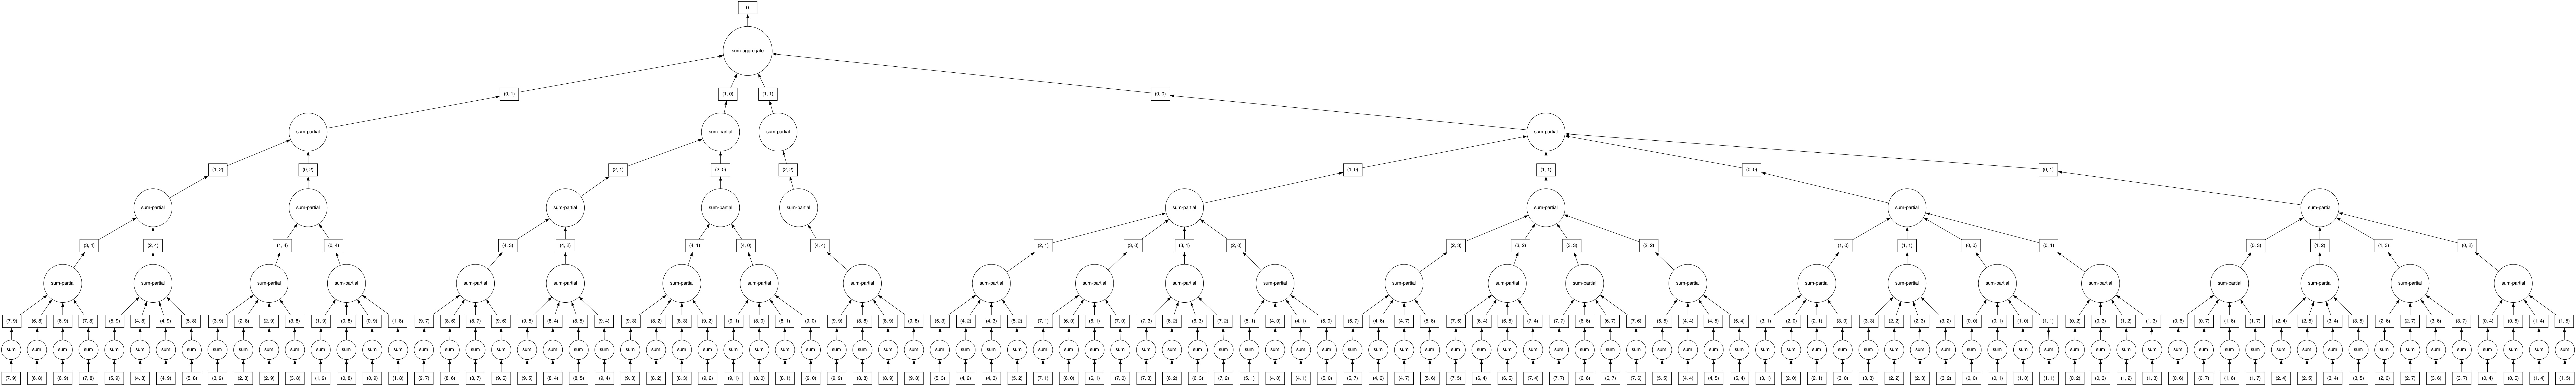

In [5]:
dask_array.sum().visualize()

In [11]:
%%time
dask_array.sum().compute()

CPU times: user 1.03 s, sys: 113 ms, total: 1.14 s
Wall time: 1.07 s


950012693